## Statistics on the Boise River from the past 40+ years

In [86]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas.core import datetools as dt
import statsmodels.tsa.api as sm
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams

# read in and initialize
df = pd.read_csv('boiseriverDischarge.csv', names=['Dates','Year','Month','Day','Parma','Lucky'], skiprows=1)
parma = df['Parma'].values
lucky = df['Lucky'].values
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.Day,format='%Y%m%d')
dates = df['Date']
days = df['Date'].dt.day
seriesLucky = pd.Series(lucky,index=dates)
seriesParma = pd.Series(parma,index=dates)

### Year window of interest

In [29]:
# Year window of interest
N = 1

### This will break apart the data into the Observed, Trend, Seasonal, and Residual values; based on the time interval specified above

--------------------Decomposition of Lucky Peak Discharge--------------------


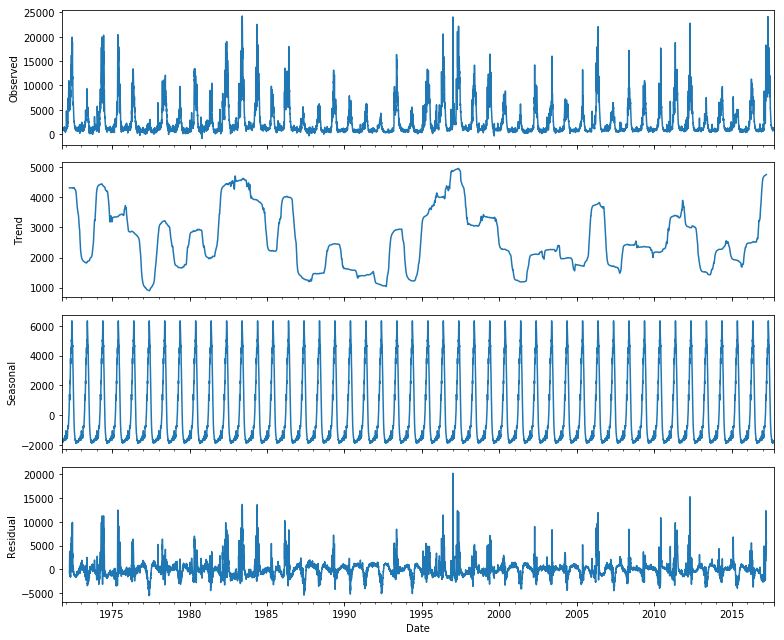

--------------------Decomposition of Parma Discharge--------------------


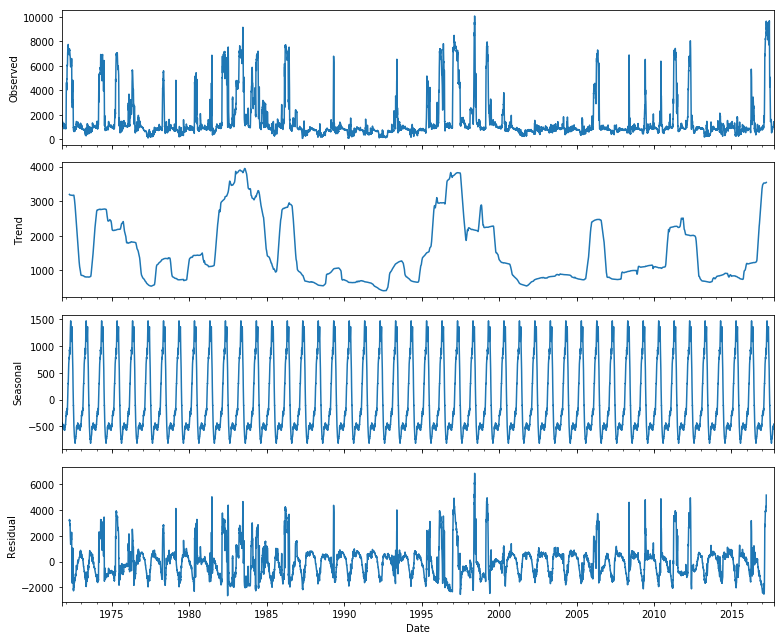

In [39]:
# Decomposition of the data based on N years
years = N*365
decompositionLucky = sm.seasonal_decompose(seriesLucky, model='additive',freq=years)
decompositionParma = sm.seasonal_decompose(seriesParma, model='additive',freq=years)

# Lucky Peak
# Decomposition
rcParams['figure.figsize'] = 11, 9
print('--------------------Decomposition of Lucky Peak Discharge--------------------')
fig = decompositionLucky.plot()
plt.show()

# Parma
# Decomposition
rcParams['figure.figsize'] = 11, 9
print('--------------------Decomposition of Parma Discharge--------------------')
fig2 = decompositionParma.plot()
plt.show()

### Check Correlation of the data

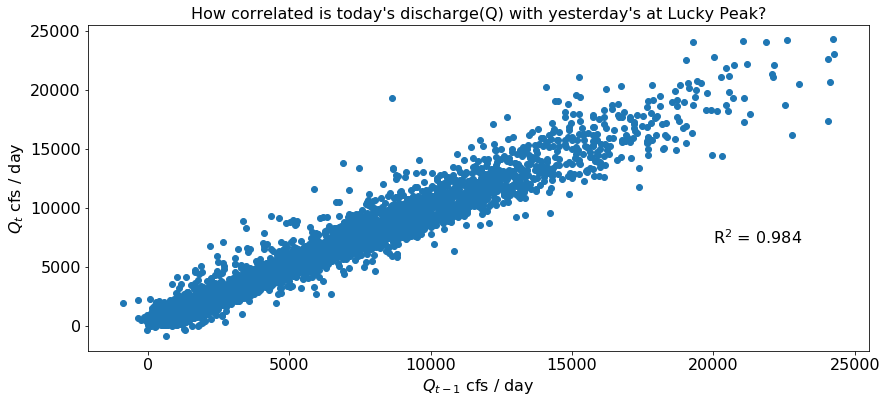

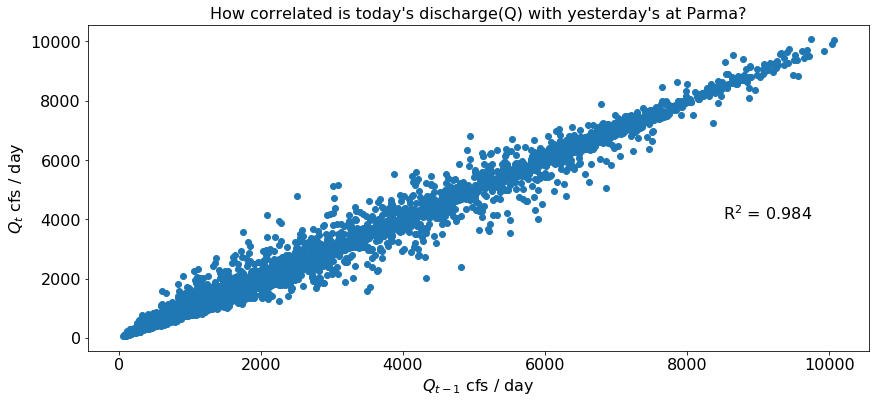

In [43]:
# Correlation with previous day
Qt   = lucky[1:-1] 
Qt2  = parma[1:-1]  
Qtm1 = lucky[0:-2]
Qt2m1 = parma[0:-2]

# Lucky Peak
# how correlated is this? 1=max
R = np.corrcoef(Qtm1,Qt)
R[1,0]
# scatter plot
plt.figure(figsize=(14,6))
plt.plot(Qtm1,Qt,'o')
plt.title('How correlated is today\'s discharge(Q) with yesterday\'s at Lucky Peak?',fontsize=16)
plt.xlabel('$Q_{t-1}$ cfs / day',fontsize=16)
plt.ylabel('$Q_t$ cfs / day',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R[0,1], xy=(20000,7000), fontsize=16)
plt.show()

# Parma
# how correlated is this? 1=max
R2 = np.corrcoef(Qt2m1,Qt2)
R2[1,0]
# scatter plot
plt.figure(figsize=(14,6))
plt.plot(Qt2m1,Qt2,'o')
plt.title('How correlated is today\'s discharge(Q) with yesterday\'s at Parma?',fontsize=16)
plt.xlabel('$Q_{t-1}$ cfs / day',fontsize=16)
plt.ylabel('$Q_t$ cfs / day',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R[0,1], xy=(8500,4000), fontsize=16)
plt.show()

### Dickey_Fuller test on the data to check for stationarity.
Stationarity is assumed when the Test Statistic is less than the Critical Values, and a p-value less than 0.05

In [38]:
# Lucky Peak Dickey Fuller test
print ('Results of Dickey-Fuller Test for Lucky Peak Discharge:')
dftest = adfuller(seriesLucky, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

# Parma Dickey Fuller test
print ('Results of Dickey-Fuller Test for Parma Discharge:')
dftest = adfuller(seriesParma, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test for Lucky Peak Discharge:
Test Statistic                -1.257271e+01
p-value                        1.987961e-23
#Lags Used                     4.300000e+01
Number of Observations Used    1.675800e+04
Critical Value (1%)           -3.430740e+00
Critical Value (5%)           -2.861712e+00
Critical Value (10%)          -2.566862e+00
dtype: float64
Results of Dickey-Fuller Test for Parma Discharge:
Test Statistic                -1.015807e+01
p-value                        7.635790e-18
#Lags Used                     3.800000e+01
Number of Observations Used    1.676300e+04
Critical Value (1%)           -3.430740e+00
Critical Value (5%)           -2.861712e+00
Critical Value (10%)          -2.566862e+00
dtype: float64


### This is the Moving Average of Lucky Peak and Parma based on N Years window
A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles. The threshold between short-term and long-term depends on the application, and the parameters of the moving average will be set accordingly.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3

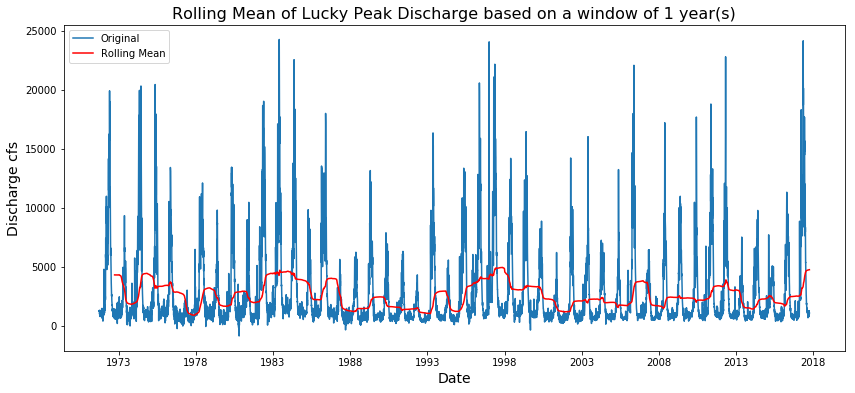

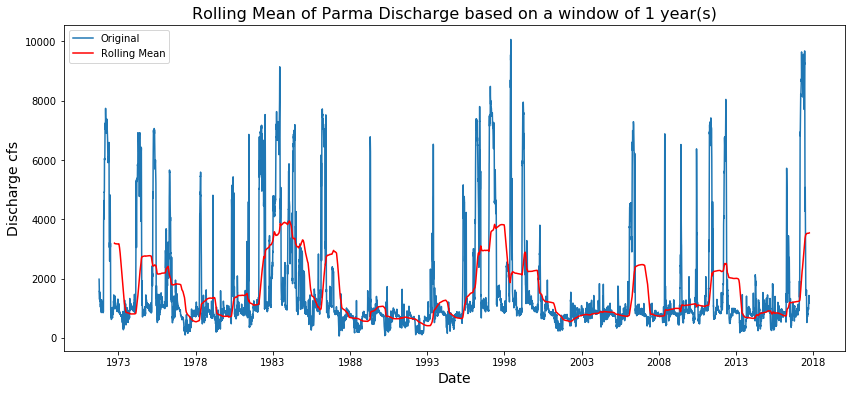

In [60]:
rolmean_lucky = pd.rolling_mean(seriesLucky, window=years, center=False)
rolstd_lucky = pd.rolling_std(seriesLucky, window=years, center=False)
rolmean_parma = pd.rolling_mean(seriesParma, window=years, center=False)
rolstd_parma = pd.rolling_std(seriesParma, window=years, center=False)
RM_Lucky = pd.rolling_mean(seriesLucky, window=years, center=False).values
RM_Parma = pd.rolling_mean(seriesParma, window=years, center=False).values

# Plot Lucky Peak rolling statistics:
plt.figure(figsize=(14,6))
orig = plt.plot(seriesLucky,label='Original')
mean = plt.plot(rolmean_lucky, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean of Lucky Peak Discharge based on a window of %i year(s)'%N,fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.show()

# Plot Parma rolling statistics:
plt.figure(figsize=(14,6))
orig = plt.plot(seriesParma,label='Original')
mean = plt.plot(rolmean_parma, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean of Parma Discharge based on a window of %i year(s)'%N,fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.show()

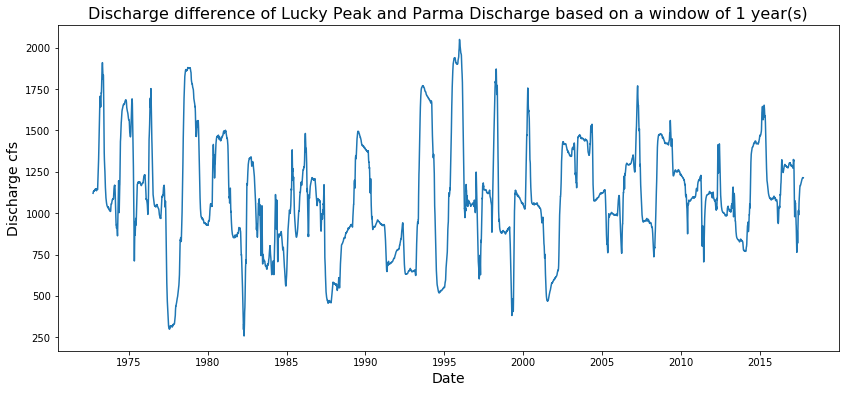

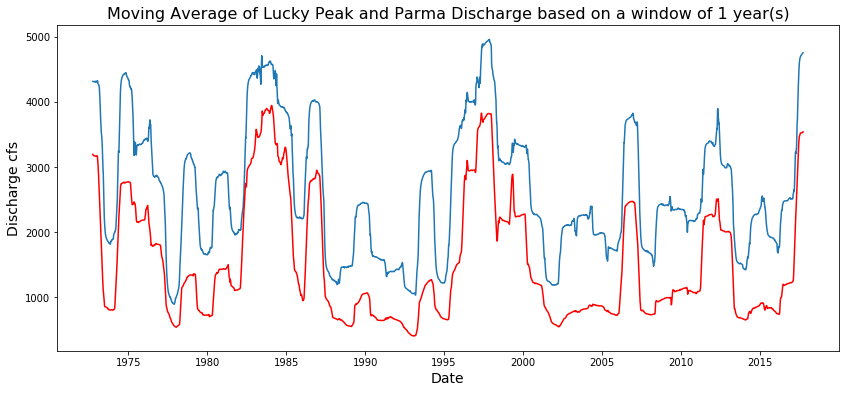

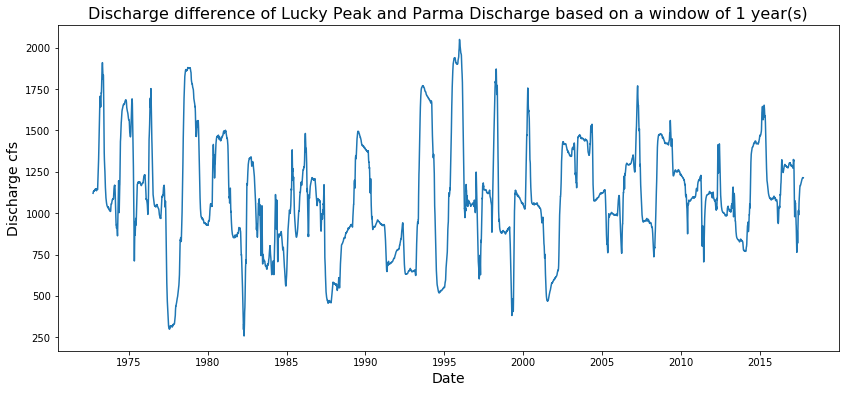

In [104]:
# Create new dataframe and trim NaN values from the data
df2 = pd.DataFrame({'Date': dates, 'RM_lucky': RM_Lucky, 'RM_Parma': RM_Parma})
filtered_df2 = df2[df2['RM_lucky'].notnull()]
RM_Lucky_f = filtered_df2['RM_lucky'].values
RM_Parma_f = filtered_df2['RM_Parma'].values
date_f = filtered_df2['Date'].values

# Calculate the difference per year between the datasets
# Difference
difference = []
for i in range(len(RM_Lucky_f)):
    x = RM_Lucky_f[i] - RM_Parma_f[i]
    difference.append(x)
    
# Plot both moving averages
plt.figure(figsize=(14,6))
plt.plot(date_f,RM_Lucky_f)
plt.plot(date_f,RM_Parma_f,'r')
plt.title('Moving Average of Lucky Peak and Parma Discharge based on a window of %i year(s)'%N,fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.show()

# Plot difference of both moving averages
plt.figure(figsize=(14,6))
plt.plot(date_f,difference)
plt.title('Discharge difference of Lucky Peak and Parma Discharge based on a window of %i year(s)'%N,fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Date',fontsize=14)
#plt.show()
##trendline
#z = np.polyfit(date_f, difference, 1)
#p = np.poly1d(z)
#plt.plot(date_f,p(date_f),"r--")
#print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()